In [1]:
import sys
print(sys.version_info)

try:
    import numpy as np
    import pandas as pd
    import skfuzzy as fuzz
    from skfuzzy import control as ctrl
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    %pip install -U numpy, matplotlib scikit-fuzzy

sys.version_info(major=3, minor=11, micro=1, releaselevel='final', serial=0)


In [2]:
names = ['low', 'average', 'high']
namesDiff = ['above','same','below']
NN = 50

/usr/local/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


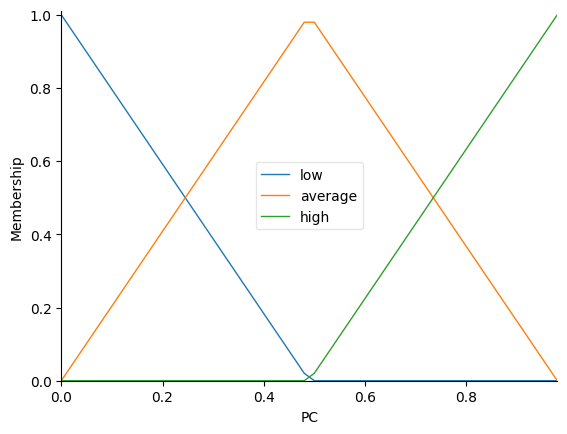

In [3]:
# FUSSIFICATION
MIN = 0.0; MAX = 1.0; npoints = (MAX-MIN)/NN
PC = ctrl.Antecedent(np.arange(MIN,MAX, npoints), 'PC')
PC.automf(3, names=names)
PC.view()

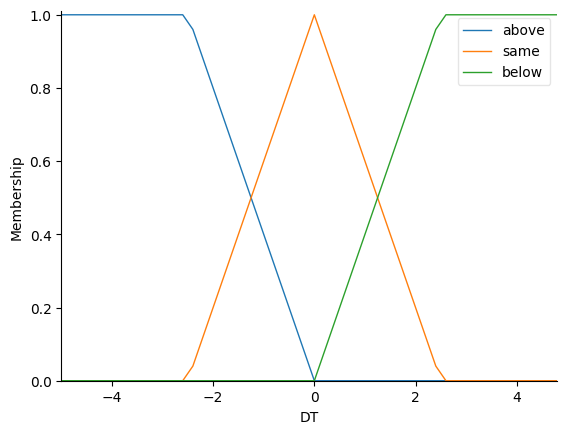

In [4]:
MIN = -5.0; MAX = 5.0; npoints = (MAX-MIN)/NN
A = -2.5; B = 2.5
DT = ctrl.Antecedent(np.arange(MIN,MAX, npoints), 'DT')
DT.automf(3, names=namesDiff)
DT[namesDiff[0]] = fuzz.membership.trapmf(np.arange(MIN,MAX, npoints),[MIN,MIN,A,0])
DT[namesDiff[1]] = fuzz.membership.trimf(np.arange(MIN,MAX, npoints),[A,0,B])
DT[namesDiff[2]] = fuzz.membership.trapmf(np.arange(MIN,MAX, npoints),[0,B,MAX,MAX])
DT.view()

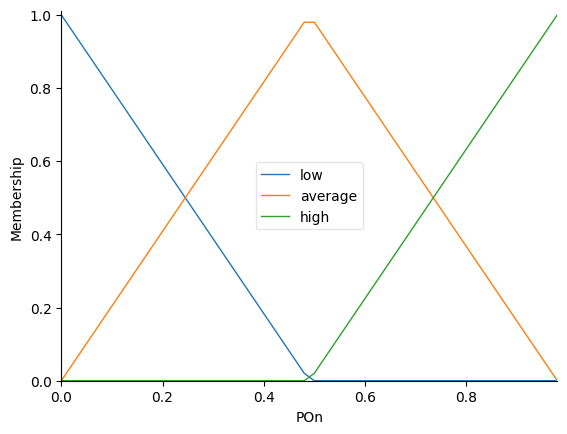

In [5]:
MIN = 0.0; MAX = 1.0; npoints = (MAX-MIN)/NN
POn = ctrl.Consequent(np.arange(MIN,MAX, npoints), 'POn')
POn.automf(3, names=names)
POn.view()

In [6]:
## FUZZY RULESpc
rule1 = ctrl.Rule(PC['high'] | DT['below'], POn['high'])
rule2 = ctrl.Rule(DT['same'] | PC['low'], POn['low'])
#rule3 = ctrl.Rule(weight['high'], health['low'])
problem_ctrl  = ctrl.ControlSystem([rule1, rule2])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

In [7]:
## APPLICATION
def check(v1,v2):
    problem.input['PC'] = v1
    problem.input['DT'] = v2
    problem.compute()
    print(problem.output['POn'])
    POn.view(sim=problem)

0.44232719858350333


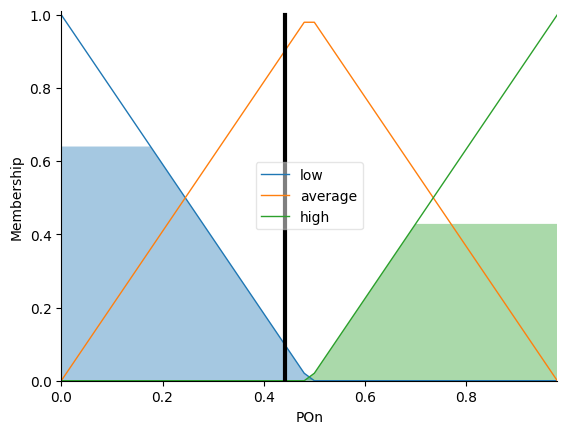

In [8]:
check(0.7,0.9)

0.4997080498866213


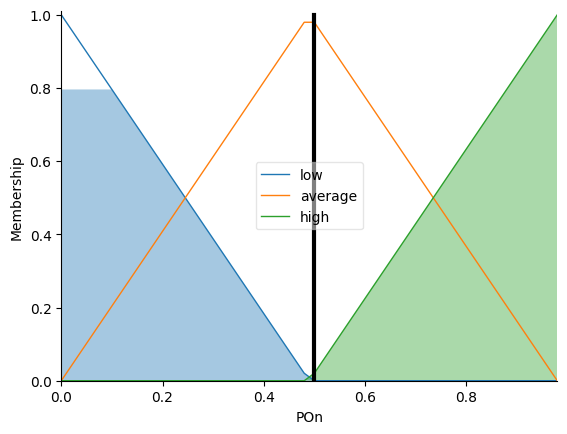

In [9]:
check(0.1,3.0)

0.16346933111296366


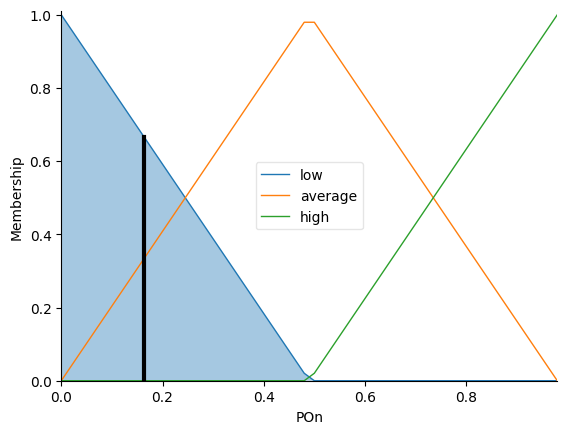

In [10]:
check(0.3,0.0)

0.8165306688870386


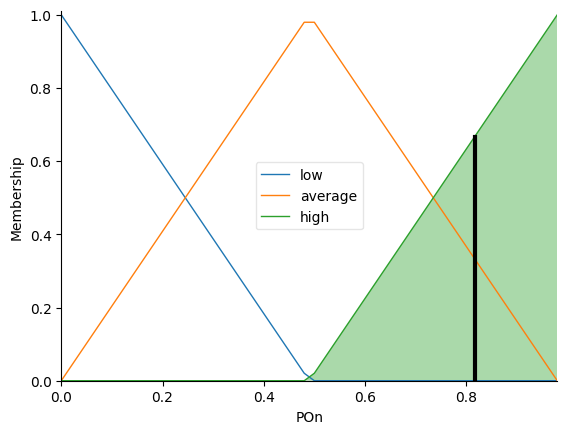

In [11]:
check(0.99,-4.9)

In [12]:
def Test(npA, npB, LL):
    names = ['low', 'average', 'high']
    namesDiff = ['above','same','below']
    NN = 50
    df = pd.DataFrame()


    MINA = -4.9; MAXA = 0.0
    LA = np.arange(MINA,MAXA,(MAXA-MINA)/npA).tolist()
    MINB = 0.0; MAXB = 4.9
    LB = np.arange(MINB,MAXB,(MAXB-MINB)/npB).tolist()

    for A in LA:
        for B in LB:
            MIN = 0.0; MAX = 1.0; npoints = (MAX-MIN)/NN
            PC = ctrl.Antecedent(np.arange(MIN,MAX, npoints), 'PC')
            PC.automf(3, names=names)

            MIN = -5.0; MAX = 5.0; npoints = (MAX-MIN)/NN
            DT = ctrl.Antecedent(np.arange(MIN,MAX, npoints), 'DT')
            DT.automf(3, names=namesDiff)
            DT[namesDiff[0]] = fuzz.membership.trapmf(np.arange(MIN,MAX, npoints),[MIN,MIN,A,0])
            DT[namesDiff[1]] = fuzz.membership.trimf(np.arange(MIN,MAX, npoints),[A,0,B])
            DT[namesDiff[2]] = fuzz.membership.trapmf(np.arange(MIN,MAX, npoints),[0,B,MAX,MAX])    
            
            MIN = 0.0; MAX = 1.0; npoints = (MAX-MIN)/NN
            POn = ctrl.Consequent(np.arange(MIN,MAX, npoints), 'POn')
            POn.automf(3, names=names)

            rule1 = ctrl.Rule(PC['high'] | DT['below'], POn['high'])
            rule2 = ctrl.Rule(DT['same'] | PC['low'], POn['low'])
            #rule3 = ctrl.Rule(weight['high'], health['low'])
            problem_ctrl  = ctrl.ControlSystem([rule1, rule2])
            problem = ctrl.ControlSystemSimulation(problem_ctrl)

            err = 0.0
            for L in LL:
                problem.input['PC'] = L[0]
                problem.input['DT'] = L[1]
                problem.compute()
                pred = problem.output['POn']
                real = L[2]
                err += (pred-real)**2
            err = (1/len(LL)*err)**0.5
            df = pd.concat([df,pd.DataFrame([[A,B,err]],columns=['A','B','err'])]) 
    df.sort_values(by="err",ascending=True, inplace=True)
    print(df.shape)
    print(df.head(20))          


In [13]:
Test(10,10,[[0.7,0.9,0.45],[0.1,0.3,0.30],[0.3,0.0,0.75]])

(100, 3)
      A     B       err
0 -4.90  0.00  0.260230
0 -1.96  0.00  0.260230
0 -2.45  0.00  0.260230
0 -1.47  0.00  0.260230
0 -2.94  0.00  0.260230
0 -3.43  0.00  0.260230
0 -4.41  0.00  0.260230
0 -0.49  0.00  0.260230
0 -0.98  0.00  0.260230
0 -3.92  0.00  0.260230
0 -2.45  1.96  0.338831
0 -2.94  1.96  0.338831
0 -1.47  1.96  0.338831
0 -3.43  1.96  0.338831
0 -3.92  1.96  0.338831
0 -0.98  1.96  0.338831
0 -1.96  1.96  0.338831
0 -0.49  1.96  0.338831
0 -4.90  1.96  0.338831
0 -4.41  1.96  0.338831
